In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-nepali/language-model')

In [6]:
p = path.glob('NepaliWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [7]:
len(files)

38757

In [8]:
train_files, test_files = train_test_split(files, test_size=0.3)

In [9]:
len(train_files), len(test_files)

(27129, 11628)

In [10]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-nepali/language-model/NepaliWikipediaArticles/5622.pkl')

In [11]:
str(train_files[0]).split('/')[-1][:-4]

'5622'

In [12]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'NepaliDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [13]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'NepaliDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [6]:
from inltk.tokenizer import NepaliTokenizer

In [7]:
NepaliTokenizer

inltk.tokenizer.NepaliTokenizer

In [8]:
# class NepaliTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/nepali_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/nepali_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [10]:
itos

['<unk>',
 '<s>',
 '</s>',
 '▁',
 'को',
 '।',
 ',',
 'मा',
 '▁।',
 '▁र',
 '.',
 'ले',
 'का',
 '▁छ',
 '▁हो',
 'लाई',
 '▁•',
 '▁यो',
 '▁q',
 '▁�',
 '▁पनि',
 '▁एक',
 'X',
 '▁यस',
 '▁थियो',
 'बाट',
 '▁तथा',
 'न',
 'ी',
 '▁भएको',
 '-',
 'हरू',
 '▁छन्',
 '�',
 '▁थिए',
 '▁रहेको',
 '▁मा',
 'र',
 'ा',
 '▁लागि',
 'े',
 '▁भने',
 'क',
 '▁हुन्छ',
 'स',
 '▁वा',
 '▁गर्ने',
 '▁गर्न',
 '▁रूपमा',
 ':',
 '▁हुन्',
 '▁आफ्नो',
 '▁विकास',
 '▁नेपाली',
 'म',
 '▁नेपालको',
 '▁सन्',
 '▁नेपाल',
 'ल',
 'ला',
 '▁नै',
 '▁गरेको',
 '▁उनले',
 '▁को',
 '▁गरिएको',
 '▁उनी',
 'हरु',
 '▁तर',
 'ता',
 '▁गरे',
 '▁वि',
 '▁गरेका',
 '▁यसको',
 '▁नाम',
 'हरूको',
 '▁अनुसार',
 '▁हुने',
 '▁वर्ष',
 '▁देखि',
 '▁क्षेत्र',
 'ि',
 '▁धेरै',
 '▁हुन',
 'ै',
 '▁एउटा',
 'ं',
 '▁दिन',
 'सँग',
 '▁जिल्ला',
 '▁गरिन्छ',
 '▁भन्ने',
 "'",
 'त',
 '▁गरी',
 '▁अ',
 '▁उनको',
 '्',
 '▁कुनै',
 'द्वारा',
 'ित',
 '▁पछि',
 '▁सबै',
 'ो',
 'की',
 '▁भयो',
 '▁अवस्थित',
 '▁जिल्लामा',
 '▁जन्म',
 'देखि',
 '▁जिल्लाको',
 '▁गाउँ',
 '▁केही',
 '"',
 '▁समिति',
 '▁राष्ट्रिय',


In [11]:
# 15,000 is the vocab size that we chose in sentencepiece
nepali_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=NepaliTokenizer, lang='ne')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
data_lm = TextLMDataBunch.from_folder(path=path/'NepaliDataset', tokenizer=tokenizer, vocab=nepali_vocab)

In [15]:
data_lm.batch_size

64

In [16]:
data_lm.save()

In [23]:
data_lm.show_batch()

idx,text
0,▁ x x b os ▁युइएफए ▁युरो ▁2016 ▁15 औँ ▁युरोपेली ▁अन्तर्राष्ट्रिय ▁पुरुष ▁फुटबल ▁प्रतियोगिता ▁हो ▁। ▁यो ▁फ्रान्स मा ▁10 ▁जुन ▁देखि ▁10 ▁जुलाई ▁2016 ▁सम्म ▁सञ्चालन ▁भएको ▁हो ▁। ▁युरो क प मा ▁सहभागी ▁राष्ट्रहरू ▁16 ▁बाट ▁बढाएर ▁24 ▁पुर् ▁या इएको ▁थियो ▁। ▁यस ▁कारणले ▁यस ▁पटक ▁नयाँ ▁राष्ट्रहरू ले ▁समेत ▁यस ▁प्रतियोगितामा ▁स्थान ▁बनाएका ▁थिए ▁। ▁स्पेन ▁हालसम्म ▁सन् ▁2008 ▁र ▁सन् ▁2012 ▁गरि ▁दुई ▁पटक
1,ल्स ले ▁टिमको ▁प्रतिनिधित्व ▁अन्तर्राष्ट्रिय ▁खेलमा ▁राष्ट्रिय ▁टोली बाट ▁गरिसकेका ▁छन् ▁। ▁यस ▁टिमले ▁सन् ▁2015 ▁अगस्ट ▁सम्म ▁65 ▁म्याच ▁खेल िसकेको ▁छ ▁। ▁यस ▁टिमको ▁जित ▁प्रतिशत ▁6 0% ▁रहेको ▁छ ▁। ▁ x x b os ▁बग र ▁ज्याम ी ▁नेपालमा ▁पाइने ▁एक ▁प्रकारको ▁चरा को ▁नाम ▁हो ▁। ▁यसलाई ▁अङ्ग्रेजीमा ▁र डी ▁टर् न स्टोन ▁भनिन्छ ▁। ▁बग र ▁ज्याम ी ▁बा ल्ड ▁हेड ▁टापु मा ▁फ्लोरिन
2,"▁राक्षस बाट ▁हुने ▁बाह्य ▁प्रकोप बाट ▁बच्न को लागी ▁पूजा ▁गरेको ▁पाइएको ▁छ ▁। ▁हुनत ▁राक्षस ▁र ▁देवता ▁कुनै ▁अलग ▁संसार का ▁प्राणी ▁होइनन् ▁। ▁राक्षस ▁र ▁देवता ▁भन्ने ▁मानव हरूको ▁स्वभाव मा ▁पर्ने ▁फरक ता बाट ▁छुट् ट य ाउन ▁सकिन्छ ▁। ▁सबै सँग ▁नराम्रो ▁व्यवहार ▁गर्ने , ▁समाजमा ▁ उछ ्र िङ कल ▁उत् पात ▁र ▁आतंक ▁म च ाउने , ▁बढी ▁पाप ▁कर्म ▁गर्ने , ▁यदी ▁धार्मीक"
3,os ▁ x x b os ▁नु ब चे ▁नेपालको ▁सोलुखुम्बु ▁जिल्लाको ▁खुम्बु ▁क्षेत्रमा ▁अवस्थित ▁महा ल ङ्गु र ▁हिमश्रृंखला ▁अन्तर्गत ▁पर्ने ▁हिमाल ▁हो । ▁यो ▁सगरमाथा बाट ▁2 ▁किलोमिटर को ▁दुरी मा ▁रहेको ▁छ । ▁यो ▁हिमाल ▁सगरमाथा को ▁पश्चिममा ▁रहेको ले ▁यसको ▁नाम ▁तिब्बती ▁र ▁शेर्पा ▁भाषामा ▁नु ब चे ▁भनिन्छ ▁जसको ▁अर्थ ▁अंग्रेजी मा ▁ er n ak ▁र ▁नेपाली मा ▁पश्चिमी ▁शिखर ▁भन्ने
4,▁लेखिएको ▁कृति ▁हो । ▁यस ▁कृति लाई ▁साझा ▁प्रकाशन ले ▁बजारमा ▁ल्याएको ▁हो । ▁यो ▁एक ▁नेपाली ▁भाषाको ▁निबन्ध ▁सङ् ▁ग्रह ▁हो । ▁ x x b os ▁कोलेस्टेरोल ▁शरीर का ▁प्रत्येक ▁कोष हरूमा ▁पाइने ▁नरम ▁चिल्लो ▁पदार्थ ▁हो ▁| यस को ▁उत्पादन ▁प्रमुख रूपमा ▁कलेजो मा ▁हुन्छ । स्व स्थ ्य ▁जीवनका ▁लागि ▁को ले स्ट्र ोल ▁आवश्यक ▁हुन्छ ▁। ▁रगतमा ▁पाइने ▁बोसो लाई ▁का ले स्ट्र ोल ▁भनिन्छ


In [17]:
len(data_lm.vocab.itos)

15000

In [25]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '▁': 3,
             'को': 4,
             '।': 5,
             ',': 6,
             'मा': 7,
             '▁।': 8,
             '▁र': 9,
             '.': 10,
             'ले': 11,
             'का': 12,
             '▁छ': 13,
             '▁हो': 14,
             'लाई': 15,
             '▁•': 16,
             '▁यो': 17,
             '▁q': 18,
             '▁�': 19,
             '▁पनि': 20,
             '▁एक': 21,
             'X': 22,
             '▁यस': 23,
             '▁थियो': 24,
             'बाट': 25,
             '▁तथा': 26,
             'न': 27,
             'ी': 28,
             '▁भएको': 29,
             '-': 30,
             'हरू': 31,
             '▁छन्': 32,
             '�': 33,
             '▁थिए': 34,
             '▁रहेको': 35,
             '▁मा': 36,
             'र': 37,
             'ा': 38,
             '▁लागि': 39,
             'े': 40,
             '▁भने': 41,
  

In [18]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [19]:
gc.collect()

49

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


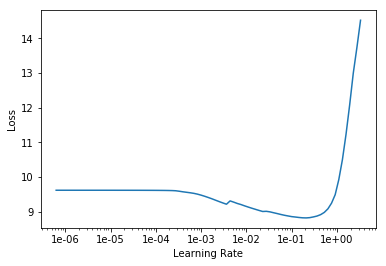

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.981783,4.914091,0.244682


In [31]:
learn.save('first', with_opt=True)

In [32]:
learn.load('first', with_opt=True);

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.703696,4.865650,0.245472
2,4.734961,4.760561,0.252126
3,4.428511,4.455662,0.282117
4,4.029394,4.140379,0.322218
5,3.621300,4.050271,0.336316


In [35]:
learn.save('second_ne_lm', with_opt=True)

In [36]:
learn.load('second_ne_lm', with_opt=True);

In [37]:
learn.fit_one_cycle(50, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.530143,4.045897,0.337327
2,3.545625,4.038839,0.338703
3,3.517672,4.028398,0.340317
4,3.521355,4.015224,0.342755
5,3.516877,3.997406,0.345512
6,3.535543,3.978984,0.348755
7,3.414012,3.956365,0.352593
8,3.529660,3.932527,0.356515
9,3.459082,3.908514,0.360790
10,3.360775,3.880475,0.365828


In [38]:
learn.save('third_ne_lm', with_opt=True)

In [20]:
learn.load('third_ne_lm', with_opt=True);

In [21]:
TEXT = "अन्तर्राष्ट्रिय खेलमा राष्ट्रिय "
N_WORDS = 40
N_SENTENCES = 2

In [22]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

अन्तर्राष्ट्रिय खेलमा राष्ट्रिय  ▁फुटबल ▁टिमले ▁अन्तर्राष्ट्रिय ▁फुटबल ▁प्रतियोगिताहरू मा ▁आफ्नो ▁सहभागीता ▁जनाए को ▁यो ▁उपाधि ▁भुटान ी ▁शरणार्थी ▁विरूद्ध ▁हुने ▁गर्दछ । ▁सन् ▁2011 - 20 ▁को ▁अन्तर मा ▁फुटबल ▁खेल बाट ▁सहभागीता ▁रहेको ▁यस ▁प्रतियोगितामा ▁युरोपेली ▁फुटबल का ▁समर्थकहरू ले ▁प्रतिस्पर्धा को
अन्तर्राष्ट्रिय खेलमा राष्ट्रिय  ▁गान कार ▁एउटा ▁वा ▁अर्को ▁स्थान को ▁प्रतिनिधित्व ▁गर्दछ । ▁यो ▁इङ्गल्याण्ड को ▁तेस्रो ▁सबैभन्दा ▁ठुलो ▁क्लब ▁हो । ▁जहाँ ▁विशेष ▁गरी ▁विपक्षी हरूसँग ▁फुटबल ▁खेल ▁हुने ▁गर्दछन् । ▁ओलम्पिक ▁खेलमा ▁जम्मा ▁57 ▁युरोपियन ▁खेलहरू मा ▁भाग ▁लिने ▁यस ▁लिगमा


In [42]:
np.exp(3.45)

31.500392308747937

In [23]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [11]:
# Generating embedding vectors for visualization

In [12]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-nepali/language-model')

In [13]:
defaults.device = torch.device('cpu')

In [14]:
learn = load_learner(path / 'NepaliDataset/')

In [15]:
encoder = get_model(learn.model)[0]

In [16]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([15000, 400])

In [17]:
embeddings = encoder.state_dict()['encoder.weight']

In [18]:
embeddings = np.array(embeddings)

In [19]:
embeddings[0].shape

(400,)

In [20]:
df = pd.DataFrame(embeddings)

In [21]:
df.shape

(15000, 400)

In [22]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.041623,0.239477,0.207100,-0.756016,0.515305,0.649874,-0.074123,-0.127715,0.129453,0.560864,...,0.208080,0.199627,0.201347,0.599645,-0.219243,-0.173216,-0.343327,-0.220877,-0.229722,-0.129632
1,-0.115878,-0.306689,0.241603,-0.371928,0.390238,0.498983,0.062610,0.080070,-0.242212,0.642005,...,-0.150218,-0.252109,-0.732067,-0.442654,-0.177245,0.129760,0.217714,0.190918,-0.666857,0.056769
2,-0.134211,-0.349775,0.222714,-0.405123,0.393746,0.471690,0.085603,0.075378,-0.234171,0.644013,...,-0.159268,-0.303057,-0.766945,-0.481663,-0.177021,0.144632,0.153843,0.214662,-0.701503,0.046112
3,-0.064299,0.137850,-0.758449,0.363158,-0.364565,-0.654638,0.424280,-0.368469,-0.394951,-0.749092,...,-0.306643,0.401317,0.180779,0.160146,-0.177995,0.297076,-0.224359,0.107439,0.149790,-0.562817
4,-0.354770,0.371633,-0.102586,0.228409,-0.080157,-1.311502,-0.820081,0.396658,0.123678,0.028998,...,-0.024179,0.225698,0.532614,-0.662155,0.491049,-0.127792,0.281906,-0.683836,-0.185341,-0.045365


In [24]:
df2 = pd.DataFrame(itos)

In [25]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁
4,को


In [26]:
df2.shape

(15000, 1)

In [27]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [28]:
encoder.state_dict()['encoder.weight'][1]

tensor([-0.1159, -0.3067,  0.2416, -0.3719,  0.3902,  0.4990,  0.0626,  0.0801,
        -0.2422,  0.6420,  0.0741, -0.0244, -0.2197, -0.2532, -0.3543, -0.1454,
         0.3927,  0.2603,  0.2626,  0.3866, -0.1908,  0.6121,  0.0940,  0.4179,
        -0.0457, -0.0734,  0.1154, -0.3867,  0.5429, -0.0309,  0.4611, -0.6760,
         0.0537, -0.1662,  0.2257,  0.5525, -0.1953,  0.5367,  0.2045, -0.1454,
         0.1317, -0.0675, -0.2056,  0.1830,  0.5230, -0.3316,  0.3559,  0.6369,
         0.2891, -0.4554, -1.0000, -0.3931, -0.3088, -0.3070,  0.0383,  0.3061,
        -0.2788, -0.3005,  0.2346, -0.3084,  0.0528,  0.2098,  0.5222,  0.4843,
         0.1159,  0.6144,  0.3489,  0.3990,  0.3196, -0.4517, -0.4419, -0.7186,
         0.3252,  0.3072,  0.3995, -0.0128,  0.2648,  0.3125, -0.4516, -0.4110,
         0.1144, -0.2902, -0.4407,  0.4210,  0.4268,  0.4472,  0.2347,  0.5862,
        -0.1805, -0.3913,  1.0908,  0.2065, -0.3774, -1.0325, -0.5829, -0.5558,
        -0.4573,  0.2167,  0.3234, -1.12